In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Project - 1 | Machine Learning/combinedcsv.csv'
df = pd.read_csv(file_path)


In [ ]:
target = df['malicious']
df = df.drop(columns=['malicious', 'md5_hash'])


In [ ]:

# Standardize the data (recommended for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Number of components to capture 95% variance: 422


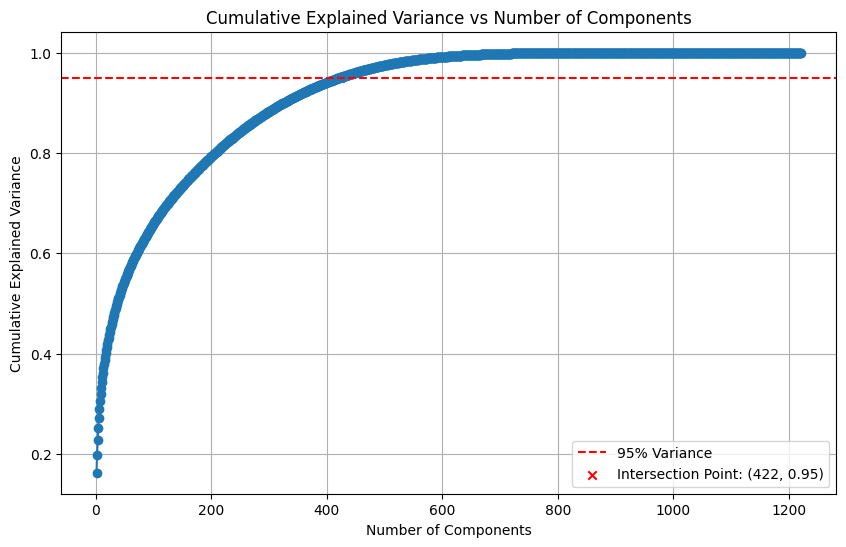

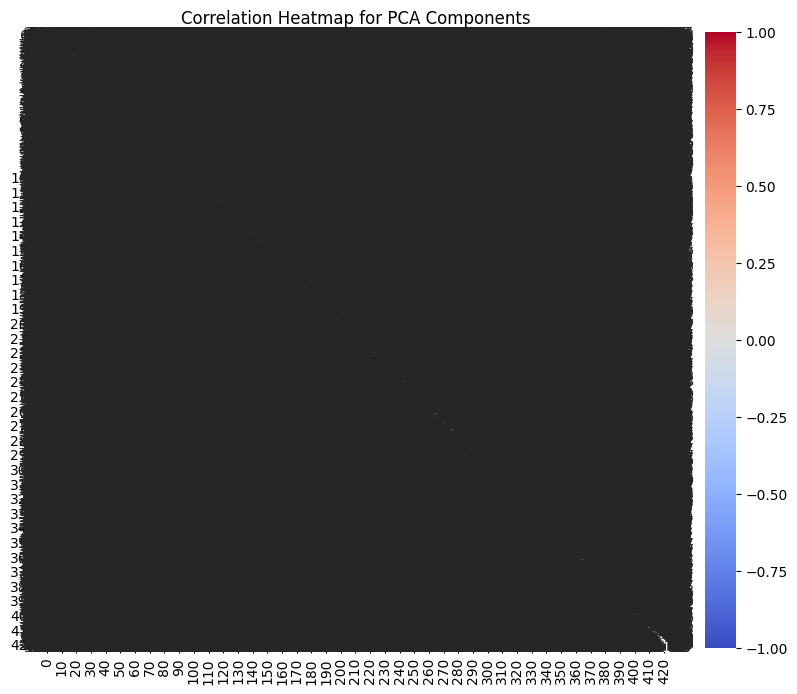

In [5]:

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Plot the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)


# Determine the number of components to capture 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to capture 95% variance: {n_components_95}')

# Add a red line for 95% variance threshold
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')

# Mark the intersection point
plt.scatter(n_components_95, 0.95, color='red', marker='x', label=f'Intersection Point: ({n_components_95}, 0.95)')
plt.legend()

plt.show()
# Perform PCA with the selected number of components
pca = PCA(n_components=n_components_95)
pca_result = pca.fit_transform(df_scaled)

# Generate the correlation matrix for the principal components
pca_corr_matrix = pd.DataFrame(np.corrcoef(pca_result, rowvar=False))

# Create a heatmap of the PCA correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pca_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for PCA Components")
plt.show()
